In [9]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline

In [3]:
# Paradoxical TCS (with reaction r'1) ODEs

def paradox1(u, t, fc, v):
    # Unpack the state variables
    x, xp, y, yp, pr, pra = u
    
    # Parameters
    v1 = fc * 25.36580
    v2 = 21.37180
    v3 = 12.950
    v4 = 10000.0
    v5 = 1000.0
    v6 = 0.713820
    v7 = 0.827270
    v8 = 0.00010
    v9 = 0.00010

    # Equations
    x_dot = -v1 * x + v * xp + v2 * xp * y + v6 * pra - v8 * x
    xp_dot = v1 * x - v2 * xp * y - v * xp
    y_dot = -v2 * xp * y + v3 * x * yp + v7 * pra - v9 * y
    yp_dot = v2 * xp * y - v3 * x * yp - v4 * yp * pr + v5 * pra
    pr_dot = -v4 * yp * pr + v5 * pra
    pra_dot = v4 * yp * pr - v5 * pra

    return [x_dot, xp_dot, y_dot, yp_dot, pr_dot, pra_dot]

# Nullcline of yp, i.e yp = f1(ytot)
def f1(x,fc,v):
    v1 = fc*25.36580
    v2 = 21.37180
    v3 = 12.950
    a = v2*v3
    b1 = v2*v3
    b0 = v*v3+v2*v1
    c = v2*v1
    
    res = (b1 * x + b0 - np.sqrt(b1**2 * x**2 + b0**2 + 2 * x * a * (b0 - 2 * c))) / (2 * a)

    return res

# Nullcline of ytot, i.e. ytot = hY(yp) such that yp = hY^{-1}(ytot)
def hY(x):
    v4 = 10000.0
    v5 = 1000.0
    v7 = 0.827270
    v9 = 0.00010
    pr_tot = 0.0166
    p = v7*pr_tot/v9+v5/v4
    q = v5/v4
    return (x - p + np.sqrt(x**2 + p**2 + x * (4 * q - 2 * p))) / 2



In [4]:
# Initial conditions
x_0 = 0.220
xp_0 = 4e-0080
y_0 = 5
yp_0 = 6e-0080
pr_0 = 0.01660
pra_0 = 0.0
z_0 = 0.220

# Define initial conditions
x_init_paradox = [x_0,xp_0,y_0,yp_0,pr_0,pra_0]

# Final time - define time span
tf = 10**6

# Fold change applied to v1, the rate of x autophosphorylation
epsilon = [1, 0.1, 0.01];  # fc = 1 corresponds to growth-limiting conditions

color1 = [0, 0.4470, 0.7410]
color2 = [0.3410, 0.7690, 0.3470]
color3 = [0.8500, 0.3250, 0.0980]
colors = [color1, color2, color3]

# Non-robust paradoxical TCS endowed with reaction r'1
v = 8.1165

# Rates of R1 and R3
v1 = 25.3658
v3 = 12.950

In [5]:

def scan_sensitivity(fc_v):
    epsilon_scan = np.linspace(0,1,100)
    t = np.linspace(0, tf, 1000000)
    result = []
    for eps in epsilon_scan*v:
        basal = f1(y_0,fc_v,eps*v)
        ode_solution = spi.odeint(paradox1,x_init_paradox,t,args=(fc_v,eps*v))
        yp = ode_solution[:, 3]
        autoreg = yp[-1]
        result.append((autoreg-basal)*100/basal)
    return result

def scan_robustness(fc_v):
    epsilon_scan = np.linspace(0,1,100)
    result = []
    for eps in epsilon_scan*v:
        basal = f1(y_0,fc_v,eps*v)
        robust = fc_v*v1/v3
        result.append((robust-basal)*100/robust)
    return result

fc_value = 1


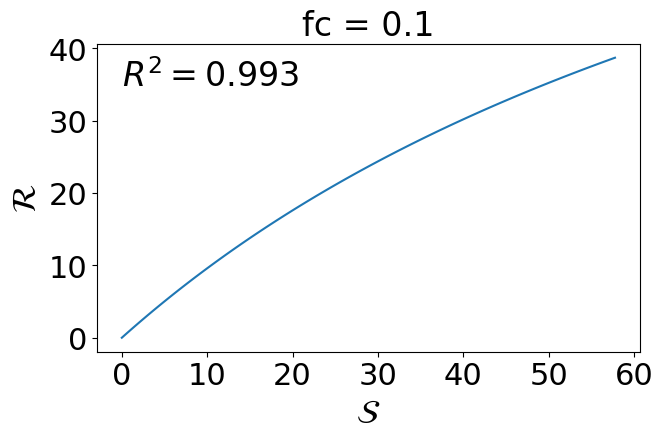

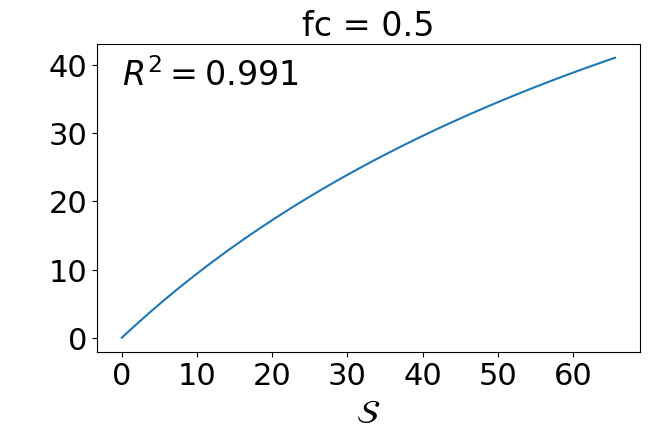

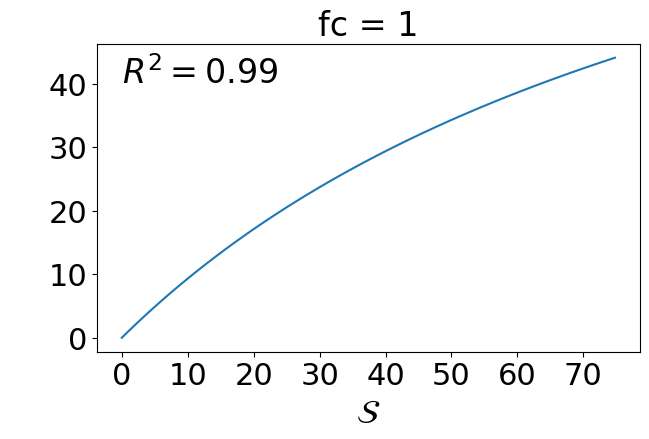

In [50]:
def plot_correlation(fc_v,ylabel=True):
    robustness = scan_robustness(fc_v)
    sensitivity = scan_sensitivity(fc_v)
    correlation = pearsonr(robustness, sensitivity)
    plt.figure(figsize=(10,6))
    plt.plot(sensitivity,robustness)
    plt.title("fc = " + str(fc_v),fontsize = 24)
    plt.xticks(fontsize=22)
    plt.yticks([0,10,20,30,40],fontsize = 22)
    plt.text(0, robustness[-1]-4, '$R^2 = $' + str(round(correlation.statistic,3)), fontsize = 24)
    plt.xlabel('$\mathcal{S}$',fontsize="24") 
    plt.ylabel('$\mathcal{R}$' if ylabel else " ",fontsize="24")
    # plt.savefig("figure_correlation" + str(fc_v) + ".png")
    plt.show()

plot_correlation (0.1,True)
plot_correlation (0.5,False) 
plot_correlation (1,False)  